In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
file_path = '/Users/kachu/Desktop/DS/smoking_driking_dataset_Ver01.csv'
health_data = pd.read_csv(file_path)
df=health_data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [24]:
df.tail()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
991341,NaN,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,NaN,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,NaN,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,NaN,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0
991345,NaN,50,160,70,90.5,1.0,1.5,1.0,1.0,133.0,...,153.0,163.0,15.8,1.0,0.9,24.0,43.0,36.0,3.0,1


In [23]:
#Classification of gender
df['sex'] = df['sex'].map({
    "Male": 0,
    "Female":1,
    })

df['DRK_YN'] = df['DRK_YN'].map({
    "N": 0,
    "Y":1,
    })

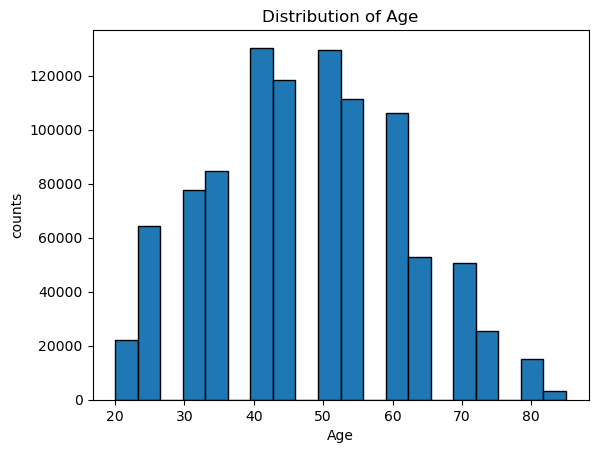

In [5]:
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

In [6]:
#check if any null values
null_values = df.isnull().sum()
print(null_values)

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


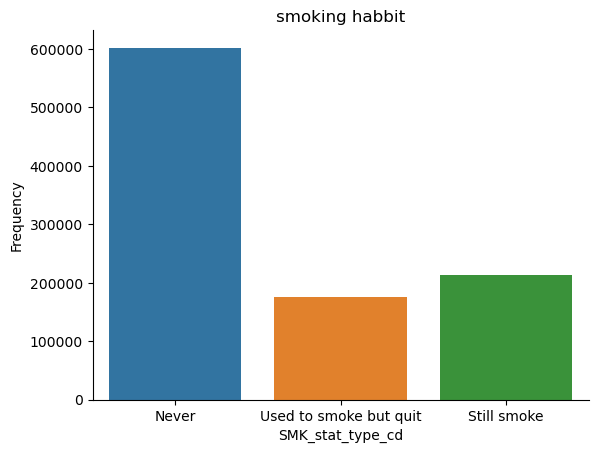

In [8]:
sns.countplot(data=df,
              x='SMK_stat_type_cd')
plt.xticks([0, 1, 2], ['Never', 'Used to smoke but quit', 'Still smoke'])
plt.ylabel('Frequency')
plt.title('smoking habbit')
sns.despine()
plt.show()

In [11]:
print(df['DRK_YN'].value_counts())

N    495858
Y    495488
Name: DRK_YN, dtype: int64


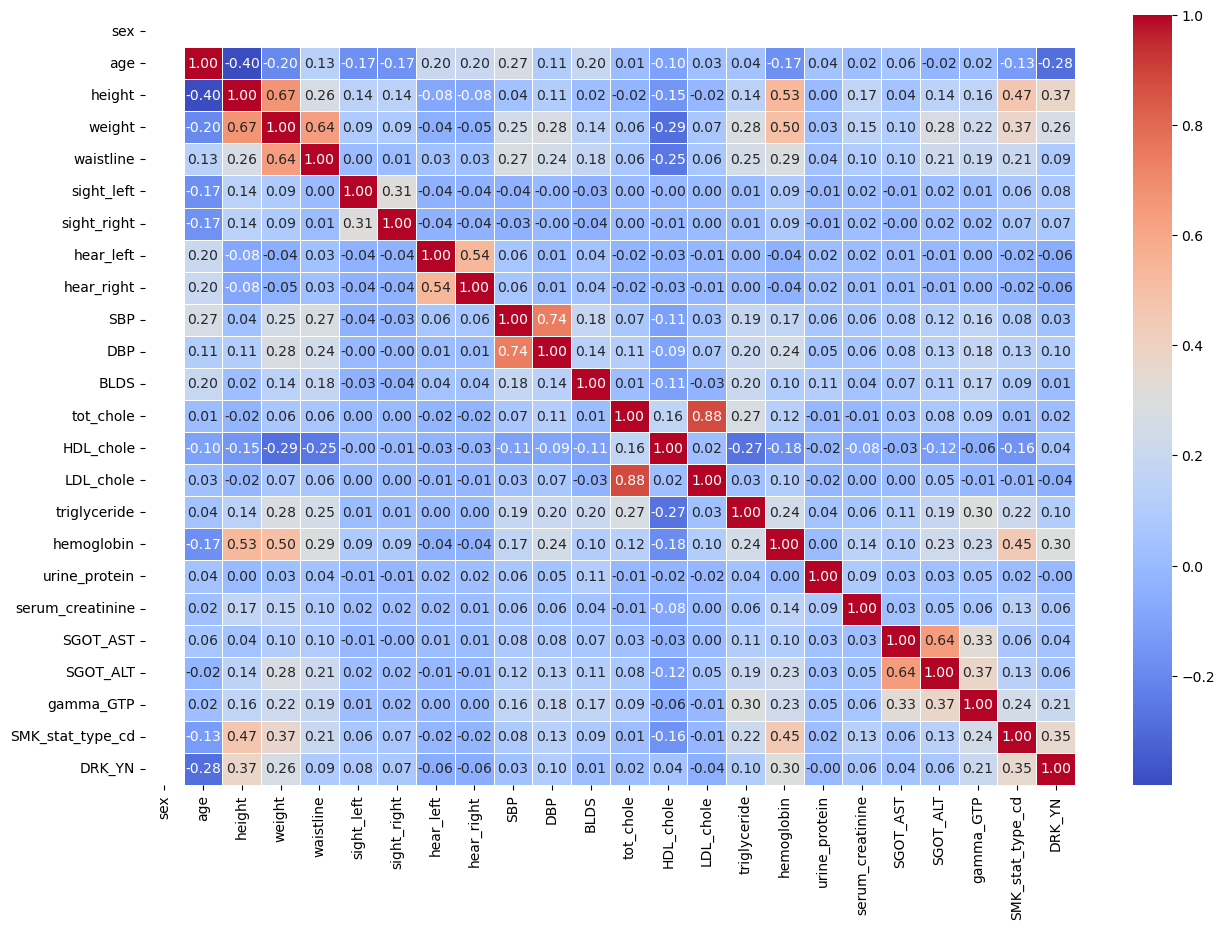

In [28]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed



# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [ ]:
# Strong Correlation
# LDL_chole & tot_chole (0.88)
# DBP & SBP (0.74)